<a href="https://colab.research.google.com/github/GokulVijayaraghavan/Understanding-Indirect-Answers/blob/main/DIS_Try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_text
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1771: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import csv
df=pd.read_excel('/content/drive/MyDrive/DL project/DIS.xlsx')
df.head(5)

,Sent1,Sent2,Con
0,A scientist making such a comment in a modern ...,It represents a view that plant biology was st...,but
1,Thought i was protecting you .,I know i made a mistake .,but
2,"When your father died , i nearly died , she pa...",I had to go on for you and bess .,but
3,So i got her number from her friend stops and ...,Harassed her until she agreed to fly out to on...,and
4,You ask of things you know nothing .,"You speak foolishly , the man threatened .",and


In [ ]:
df['Con'].value_counts()

but        51257
and        50995
when       26432
if         23773
because     8371
Name: Con, dtype: int64

In [ ]:
df['final_sentence'] = df['Sent1'].str.cat(df['Sent2'],sep=" [SEP] ")
df['Con'] = df['Con'].replace('but', 'No')
df['Con'] = df['Con'].replace('and', 'Yes')
df['Con'] = df['Con'].replace('because', 'Yes')
df['Con'] = df['Con'].replace('if', 'Yes, subject to some conditions')
df['Con'] = df['Con'].replace('when', 'Yes, subject to some conditions')
df['Con'].value_counts()

Yes                                59366
No                                 51257
Yes, subject to some conditions    50205
Name: Con, dtype: int64

In [ ]:
df = df.head(10000)
df['Con'].value_counts()

Yes                                3748
No                                 3199
Yes, subject to some conditions    3053
Name: Con, dtype: int64

In [ ]:
y = pd.get_dummies(df.Con, prefix='con')
y['con_In the middle, neither yes nor no'] = 0
y['con_Other'] = 0
y['con_N/A'] = 0
y

,con_No,con_Yes,"con_Yes, subject to some conditions","con_In the middle, neither yes nor no",con_Other,con_N/A
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
9995,0,1,0,0,0,0
9996,0,1,0,0,0,0
9997,1,0,0,0,0,0
9998,0,0,1,0,0,0


In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", trainable=True)
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True)

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text') # Textual input layer
preprocessed_text = bert_preprocess(text_input) # The preprocessing of text
outputs = bert_encoder(preprocessed_text) # Encoded o/p

# Neural network layers
l = tf.keras.layers.Dense(6, activation='softmax', name="soft_output")(outputs['pooled_output'])

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
import keras
optim = tf.keras.optimizers.Adam(0.00002)
optim.learning_rate.assign(0.00002)
print(optim.learning_rate)
model.compile(optimizer=optim,loss='CategoricalCrossentropy',metrics=METRICS)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2e-05>


In [ ]:
model.fit(df['final_sentence'], y, epochs=2, batch_size=32)

Epoch 1/2
313/313 [==============================] - 513s 2s/step - loss: 0.8117 - accuracy: 0.8860 - precision: 0.7085 - recall: 0.5373
Epoch 2/2
313/313 [==============================] - 495s 2s/step - loss: 0.5549 - accuracy: 0.9238 - precision: 0.7968 - recall: 0.7284


In [ ]:
df_valid = pd.read_excel('/content/drive/MyDrive/DL project/circa_validate.xlsx')
#print(df_valid['goldstandard2'].value_counts())
df_valid['goldstandard2'] = df_valid['goldstandard2'].replace(np.nan, 'N/A')
df_valid['goldstandard2'] = df_valid['goldstandard2'].astype(str)
df_valid['F'] = df_valid['question-X'].str.cat(df_valid['answer-Y'],sep=" [SEP] ")
df_valid['F']
print(df_valid['F'].value_counts())

Do you own property already? [SEP] I've only ever rented.                    2
Do you like Jay Z's music? [SEP] I prefer Beyonce's.                         2
Have you ever read Neil Gaiman? [SEP] Who is he?                             2
Did you lock the door? [SEP] I think I did                                   2
Am I the same as you thought I'd be now? [SEP] You haven't changed a bit.    2
                                                                            ..
Is your job related to IT? [SEP] It's in a related field.                    1
How about Stephen King? [SEP] Stephen King is a master!                      1
Is this a fun neighbourhood? [SEP] I can't believe how fun it is.            1
Are you looking for a novel? [SEP] I prefer self-help books.                 1
Did you go to University? [SEP] I graduated from UCLA.                       1
Name: F, Length: 6845, dtype: int64


In [ ]:
y_valid = pd.get_dummies(df_valid.goldstandard2, prefix='con')
y_valid

,"con_In the middle, neither yes nor no",con_N/A,con_No,con_Other,con_Yes,"con_Yes, subject to some conditions"
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
6849,0,0,0,0,1,0
6850,0,0,1,0,0,0
6851,0,0,0,0,1,0
6852,0,0,0,0,1,0


In [ ]:
model.evaluate(df_valid['F'], y_valid)

215/215 [==============================] - 135s 624ms/step - loss: 5.6892 - accuracy: 0.7077 - precision: 0.0736 - recall: 0.0651


[5.68915319442749,
 0.7077375054359436,
 0.07363381236791611,
 0.06507149338722229]

In [ ]:
y_predicted = model.predict(df_valid['F'])

In [ ]:
y_predicted

array([[9.1056496e-01, 8.1469424e-02, 5.9025935e-03, 9.1805577e-04,
        6.9078966e-04, 4.5417703e-04],
       [8.5655004e-02, 2.0391354e-01, 7.0987660e-01, 2.7764257e-04,
        1.5160519e-04, 1.2562975e-04],
       [7.0140886e-01, 2.0562421e-01, 9.1122068e-02, 9.3674351e-04,
        4.4578005e-04, 4.6234392e-04],
       ...,
       [5.8150846e-01, 4.0316635e-01, 1.4532319e-02, 2.4046785e-04,
        3.3710652e-04, 2.1530509e-04],
       [2.8709039e-01, 5.3632540e-01, 1.7577611e-01, 1.9824621e-04,
        2.8309203e-04, 3.2679850e-04],
       [6.6971558e-01, 3.2289612e-01, 4.9510435e-03, 7.2893989e-04,
        9.6964464e-04, 7.3872972e-04]], dtype=float32)

In [ ]:
y_predicted.shape

(6854, 6)

In [ ]:
pred_results = tf.cast(tf.equal(y_predicted, tf.reduce_max(y_predicted, axis = 1, keepdims=True)), tf.float32)

In [ ]:
pred_results

<tf.Tensor: shape=(6854, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
pred_results = pd.DataFrame(pred_results.numpy(), columns = ['con_No',
                                       'con_Yes',
                                       'con_Yes, subject to some conditions',
                                       'con_In the middle, neither yes nor no', 	
                                       'con_Other',
                                       'con_N/A'	  	
                                       ])

pred_results.shape
pred_results.to_numpy()
pred_results = [np.where(r==1)[0][0] for r in pred_results.to_numpy()]
pred_results = pd.DataFrame(pred_results, columns=['goldstandard2'])

pred_results['goldstandard2'] = pred_results['goldstandard2'].map({0:'No', 
                                                   1:'Yes',
                                                   2:'Yes, subject to some conditions', 
                                                   3:'In the middle, neither yes nor no', 
                                                   4:'Other' ,
                                                   5:'N/A',})

In [ ]:
y_valid.shape
y_valid.to_numpy()
validation_gtruths = [np.where(r==1)[0][0] for r in y_valid.to_numpy()]
validation_gtruths = pd.DataFrame(validation_gtruths, columns=['goldstandard2'])

validation_gtruths['goldstandard2'] = validation_gtruths['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

In [ ]:
# MNLI Output
from sklearn.metrics import classification_report
print(classification_report(pred_results['goldstandard2'], validation_gtruths['goldstandard2']))

                                   precision    recall  f1-score   support

In the middle, neither yes nor no       0.00      0.00      0.00         0
                              N/A       0.00      0.00      0.00         0
                               No       0.75      0.45      0.57      4209
                            Other       0.00      0.00      0.00         0
                              Yes       0.34      0.65      0.45      1764
  Yes, subject to some conditions       0.01      0.01      0.01       881

                         accuracy                           0.45      6854
                        macro avg       0.18      0.19      0.17      6854
                     weighted avg       0.55      0.45      0.46      6854



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_circa_train = pd.read_excel('/content/drive/MyDrive/DL project/circa_train.xlsx')
df_circa_train = df_circa_train[['question-X','answer-Y','goldstandard2']].copy()
df_circa_train

,question-X,answer-Y,goldstandard2
0,Will you be going to the big New Year's Eve pa...,I have not made plans yet.,"In the middle, neither yes nor no"
1,Do you enjoy water sports?,I surf.,Yes
2,Have you heard Mozart?,Of course,Yes
3,Have you ever listened to Papa Roach?,I have not heard of Papa Roach,No
4,Have you been well?,I was sick last week with a cold.,No
...,...,...,...
20555,Do you enjoy long books?,I can never get through them.,No
20556,Do you listen to music on the radio?,I no longer listen to the radio with Spotify a...,No
20557,Did you read the Game of Thrones books?,I didn't read any of the Game of Thrones.,No
20558,Have you ever been here before?,"Once, long ago.",Yes


In [ ]:
df_circa_train['goldstandard2'] = df_circa_train['goldstandard2'].replace(np.nan, 'N/A')
df_circa_train['goldstandard2'] = df_circa_train['goldstandard2'].astype(str)
df_circa_train['final'] = df_circa_train['question-X'].str.cat(df_circa_train['answer-Y'],sep=" [SEP] ")
df_circa_train['final']

0        Will you be going to the big New Year's Eve pa...
1                 Do you enjoy water sports? [SEP] I surf.
2                   Have you heard Mozart? [SEP] Of course
3        Have you ever listened to Papa Roach? [SEP] I ...
4        Have you been well? [SEP] I was sick last week...
                               ...                        
20555    Do you enjoy long books? [SEP] I can never get...
20556    Do you listen to music on the radio? [SEP] I n...
20557    Did you read the Game of Thrones books? [SEP] ...
20558    Have you ever been here before? [SEP] Once, lo...
20559    Was the airport crowded? [SEP] It was rather e...
Name: final, Length: 20560, dtype: object

In [ ]:
y_circa_train = pd.get_dummies(df_circa_train.goldstandard2, prefix='con')
y_circa_train

,"con_In the middle, neither yes nor no",con_N/A,con_No,con_Other,con_Yes,"con_Yes, subject to some conditions"
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
20555,0,0,1,0,0,0
20556,0,0,1,0,0,0
20557,0,0,1,0,0,0
20558,0,0,0,0,1,0


In [ ]:
model.fit(df_circa_train['final'], y_circa_train, epochs=3, batch_size=16)

Epoch 1/3
1285/1285 [==============================] - 1055s 816ms/step - loss: 0.6684 - accuracy: 0.9256 - precision: 0.7995 - recall: 0.7392
Epoch 2/3
1285/1285 [==============================] - 1047s 815ms/step - loss: 0.4107 - accuracy: 0.9567 - precision: 0.8837 - recall: 0.8521
Epoch 3/3
1285/1285 [==============================] - 1049s 816ms/step - loss: 0.2743 - accuracy: 0.9717 - precision: 0.9281 - recall: 0.9000


In [ ]:
df_valid = pd.read_excel('/content/drive/MyDrive/DL project/circa_test.xlsx')
#print(df_valid['goldstandard2'].value_counts())
df_valid['goldstandard2'] = df_valid['goldstandard2'].replace(np.nan, 'N/A')
df_valid['goldstandard2'] = df_valid['goldstandard2'].astype(str)
df_valid['F'] = df_valid['question-X'].str.cat(df_valid['answer-Y'],sep=" [SEP] ")
df_valid['F']
print(df_valid['F'].value_counts())

Would you like to meet me for a drink? [SEP] I'm not drinking this month.            2
Want to eat some spicy food? [SEP] Spicy food hurts my stomach.                      2
Did you get a job in that area? [SEP] I'm still looking.                             2
Does it have two bedrooms? [SEP] It's a studio.                                      2
Did you enjoy the train ride up here? [SEP] It was very scenic.                      2
                                                                                    ..
Have you had pizza recently [SEP] I had a New York slice last week.                  1
Do you stay up late? [SEP] I can party all night.                                    1
Do your folks still live it the same place? [SEP] They're still in the old house.    1
Do you still live in the same area? [SEP] I just moved back.                         1
Are you vegetarian or vegan? [SEP] I'm a vegan.                                      1
Name: F, Length: 6840, dtype: int64


In [ ]:
y_valid = pd.get_dummies(df_valid.goldstandard2, prefix='con')
y_valid

,"con_In the middle, neither yes nor no",con_N/A,con_No,con_Other,con_Yes,"con_Yes, subject to some conditions"
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
6849,0,0,0,0,1,0
6850,0,0,0,0,1,0
6851,0,0,0,0,1,0
6852,0,0,1,0,0,0


In [ ]:
model.evaluate(df_valid['F'], y_valid)

215/215 [==============================] - 131s 609ms/step - loss: 0.5588 - accuracy: 0.9494 - precision: 0.8555 - recall: 0.8381


[0.5587805509567261, 0.949421226978302, 0.85552579164505, 0.8380507826805115]

In [ ]:
y_predicted = model.predict(df_valid['F'])

In [ ]:
y_predicted.shape

(6854, 6)

In [ ]:
pred_results = tf.cast(tf.equal(y_predicted, tf.reduce_max(y_predicted, axis = 1, keepdims=True)), tf.float32)
pred_results

<tf.Tensor: shape=(6854, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)>

In [ ]:
pred_results = pd.DataFrame(pred_results.numpy(), columns = ['con_In the middle, neither yes nor no',
                                       'con_N/A','con_No',
                                       'con_Other', 	
                                       'con_Yes',
                                       'con_Yes, subject to some conditions'	  	
                                       ])

pred_results.shape
pred_results.to_numpy()
pred_results = [np.where(r==1)[0][0] for r in pred_results.to_numpy()]
pred_results = pd.DataFrame(pred_results, columns=['goldstandard2'])

pred_results['goldstandard2'] = pred_results['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

In [ ]:
y_valid.shape
y_valid.to_numpy()
validation_gtruths = [np.where(r==1)[0][0] for r in y_valid.to_numpy()]
validation_gtruths = pd.DataFrame(validation_gtruths, columns=['goldstandard2'])

validation_gtruths['goldstandard2'] = validation_gtruths['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred_results['goldstandard2'], validation_gtruths['goldstandard2']))

                                   precision    recall  f1-score   support

In the middle, neither yes nor no       0.37      0.35      0.36       192
                              N/A       0.01      0.40      0.03         5
                               No       0.84      0.87      0.86      2512
                            Other       1.00      0.87      0.93       143
                              Yes       0.91      0.86      0.88      3531
  Yes, subject to some conditions       0.86      0.86      0.86       471

                         accuracy                           0.85      6854
                        macro avg       0.67      0.70      0.65      6854
                     weighted avg       0.87      0.85      0.86      6854



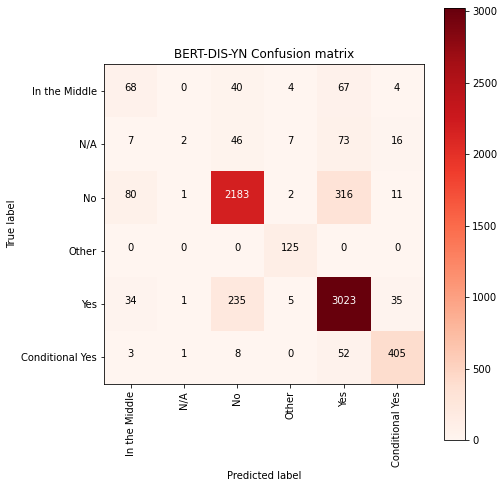

In [ ]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(validation_gtruths['goldstandard2'], pred_results['goldstandard2'])

import numpy as np
import itertools
import matplotlib.pyplot as plt

# Method to get a more visual interpretation
# source: https://www.kaggle.com/fuzzywizard/fashion-mnist-cnn-keras-accuracy-93
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='BERT-DIS-YN Confusion matrix',
                          cmap=plt.cm.Reds): # Vary color by cm.Oranges, cm.Reds etc.
    plt.figure(figsize=(7,7)) # Vary for size adjustments
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Call the plot_confusion_matrix method - Make sure the class labels are in the correct order here!
plot_confusion_matrix(cmat, 
            classes = ['In the Middle','N/A','No','Other','Yes','Conditional Yes'])